# Simple Linear regression

In [16]:
#import modul

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)


#import modul untuk model ML
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, r2_score

#read data
df=sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Define Features & Label

In [4]:
#feature
X=df['total_bill']
X.head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

In [5]:
#label/target
y=df['tip']
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [6]:
#cek sebaran fitur
X.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

## Modeling

In [7]:
#add initial constant
X=sm.add_constant(X)
X.head()

,const,total_bill
0,1.0,16.99
1,1.0,10.34
2,1.0,21.01
3,1.0,23.68
4,1.0,24.59


In [8]:
#create model : Proses pendefinisian model
model=sm.OLS(y,X)

#fit model : Proses model belajar dari data
reg=model.fit()

#Show Summary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           6.69e-34
Time:                        09:16:54   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Interpretation

$y=\beta_{0}+\beta_{1}*x_{1}$

**tips=0.9203+0.105*total_bill**

1. R-Squared = 0.457

    Artinya, model(dengan fitur `total_bill`) dapat menjelaskan 45.7% variance dari `tips`. Sisanya 54.3% dapat dijelaskan oleh fitur lain.

1. F-Test (Apakah semua fitur sekaligus berpengaruh signifikan terhadap label ?)
    - $H_{0} : \beta_{1} = 0$ ( `total_bill` tidak berpengaruh signifikan terhadap `tip` )
    - $H_{1} : \beta_{1} \neq 0$ ( `total_bill` berpengaruh signifikan terhadap `tip` )
    - significancy ($\alpha$) : 0.05
    - p-value → Prob(F-statistic) :	6.69e-34
    - p-value < 0.05 → Reject $H_{0}$
    Artinya `total_bill` berpengaruh signifikan terhadap `tip`.
    
1. T-Test → $\beta_{0}$ : Constant/Intercept (Apakah model membutuhkan intercept/constant ?)
    - $H_{0} : \beta_{0} = 0$ ( `intercept` tidak berpengaruh signifikan terhadap `tip`/model tidak membutuhkan intercept )
    - $H_{1} : \beta_{0} \neq 0$ (  `intercept` berpengaruh signifikan terhadap `tip`/model membutuhkan intercept )
    - significancy ($\alpha$) : 0.05
    - p-value → P>|t| :	0.000
    - p-value < 0.05 → Reject $H_{0}$
    Artinya model membutuhkan intercept.
    
1. T-Test → $\beta_{1}$ : Slope  (Apakah fitur 1 berpengaruh signifikan terhadap label ?)
    - $H_{0} : \beta_{1} = 0$ ( `total_bill` tidak berpengaruh signifikan terhadap `tip` )
    - $H_{1} : \beta_{1} \neq 0$ (  `total_bill` berpengaruh signifikan terhadap `tip` )
    - significancy ($\alpha$) : 0.05
    - p-value → P>|t| :	0.000
    - p-value < 0.05 → Reject $H_{0}$
    Artinya `total_bill` berpengaruh signifikan terhadap `tip`.

1. **Tip (y)=0.9203 + 0.105*Total Bill(x1)**
    - $\beta_{0}=0.9203$. Artinya nilai tip(y) adalah 0.9203 Dollar saat nilai Total Billnya nya sebesar 0 Dollar.
    - $\beta_{1}=0.105$. Artinya setiap penambahan total_bill(x1) sebesar 1 Dollar, maka nilai tip(y) akan bertambah sebesar 0.105 Dollar. 
    - Interpretasi model ini berlaku pada rentang total_bill antara 3 hingga 51 Dollar

## Model Visualization

### Dengan Intercept

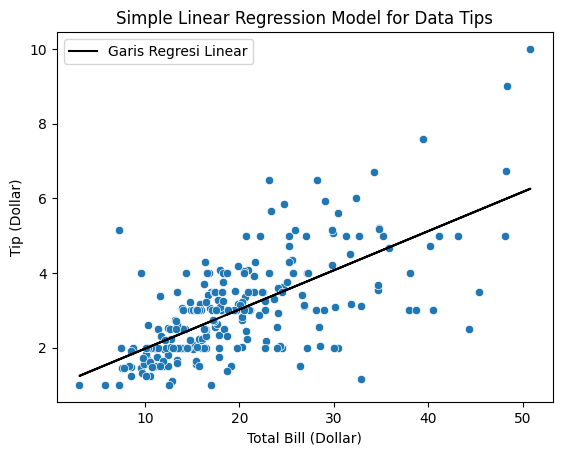

In [15]:
slope=0.105
intercept=0.9203
sns.scatterplot(data=df,x='total_bill',y='tip')
plt.plot(df['total_bill'],intercept+slope*df['total_bill'],color='black',label='Garis Regresi Linear')
plt.title('Simple Linear Regression Model for Data Tips')
plt.xlabel('Total Bill (Dollar)')
plt.ylabel('Tip (Dollar)')
plt.legend()
plt.show()

### Tanpa Intercept

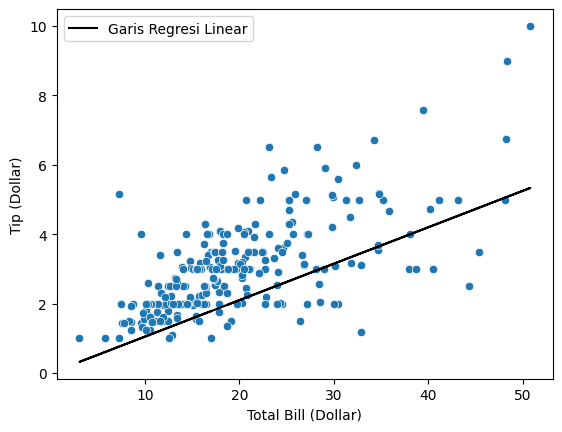

In [13]:
slope=0.105
sns.scatterplot(data=df,x='total_bill',y='tip')
plt.plot(df['total_bill'],slope*df['total_bill'],color='black',label='Garis Regresi Linear')
plt.xlabel('Total Bill (Dollar)')
plt.ylabel('Tip (Dollar)')
plt.legend()
plt.show()

# Multiple Linear regression

## Define Features & Label

In [17]:
#feature
X=df[['total_bill','size']]
X.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


In [18]:
#label/target
y=df['tip']
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [19]:
#cek sebaran fitur
X.describe()

,total_bill,size
count,244.000000,244.000000
mean,19.785943,2.569672
std,8.902412,0.951100
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.000000
75%,24.127500,3.000000
max,50.810000,6.000000


## Modeling

In [20]:
#add initial constant
X=sm.add_constant(X)
X.head()

,const,total_bill,size
0,1.0,16.99,2
1,1.0,10.34,3
2,1.0,21.01,3
3,1.0,23.68,2
4,1.0,24.59,4


In [21]:
#create model : Proses pendefinisian model
model=sm.OLS(y,X)

#fit model : Proses model belajar dari data
reg=model.fit()

#Show Summary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           9.67e-34
Time:                        09:36:14   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Interpretation

$y=\beta_{0}+\beta_{1}*x_{1}+\beta_{2}*x_{2}$

**tips=0.6689 + 0.0927 * total_bill + 0.1926 * size**

1. R-Squared = 0.468

    Artinya, model(dengan fitur `total_bill` dan `size`) dapat menjelaskan 46.8% variance dari `tips`. Sisanya 53.2% dapat dijelaskan oleh fitur lain.

1. F-Test (Apakah semua fitur sekaligus(`total_bill` dan `size`) berpengaruh signifikan terhadap label ?)
    - $H_{0} : \beta_{1} = \beta_{2} = 0$ ( `total_bill` dan `size` sekaligus tidak berpengaruh signifikan terhadap `tip` )
    - $H_{1} : \beta_{1} \neq 0 \cup \beta_{2} \neq 0$ ( `total_bill` dan `size` sekaligus berpengaruh signifikan terhadap `tip` )
    - significancy ($\alpha$) : 0.05
    - p-value → Prob(F-statistic) :	9.67e-34
    - p-value < 0.05 → Reject $H_{0}$
    Artinya `total_bill` dan `size` berpengaruh signifikan terhadap `tip`.
    
1. T-Test → $\beta_{0}$ : Constant/Intercept (Apakah model membutuhkan intercept/constant ?)
    - $H_{0} : \beta_{0} = 0$ ( `intercept` tidak berpengaruh signifikan terhadap `tip`/model tidak membutuhkan intercept )
    - $H_{1} : \beta_{0} \neq 0$ (  `intercept` berpengaruh signifikan terhadap `tip`/model membutuhkan intercept )
    - significancy ($\alpha$) : 0.05
    - p-value → P>|t| :	0.001
    - p-value < 0.05 → Reject $H_{0}$
    Artinya model membutuhkan intercept.
    
1. T-Test → $\beta_{1}$ : Slope  (Apakah fitur 1 berpengaruh signifikan terhadap label ?)
    - $H_{0} : \beta_{1} = 0$ ( `total_bill` tidak berpengaruh signifikan terhadap `tip` )
    - $H_{1} : \beta_{1} \neq 0$ (  `total_bill` berpengaruh signifikan terhadap `tip` )
    - significancy ($\alpha$) : 0.05
    - p-value → P>|t| :	0.000
    - p-value < 0.05 → Reject $H_{0}$
    Artinya `total_bill` berpengaruh signifikan terhadap `tip`.
     
1. T-Test → $\beta_{2}$ : Slope  (Apakah fitur 2 berpengaruh signifikan terhadap label ?)
    - $H_{0} : \beta_{2} = 0$ ( `size` tidak berpengaruh signifikan terhadap `tip` )
    - $H_{1} : \beta_{2} \neq 0$ (  `size` berpengaruh signifikan terhadap `tip` )
    - significancy ($\alpha$) : 0.05
    - p-value → P>|t| :	0.025
    - p-value < 0.05 → Reject $H_{0}$
    Artinya `size` berpengaruh signifikan terhadap `tip`.

1. **Tip (y)=0.6689 + 0.0927 * Total Bill(x1) + 0.1926 * Size(x2)**
    - $\beta_{0}=0.6689$. Artinya nilai tip(y) adalah 0.6689 Dollar saat nilai Total Billnya nya sebesar 0 Dollar dan sizenya sebesar 0.
    - $\beta_{1}=0.0927$. Artinya setiap penambahan total_bill(x1) sebesar 1 Dollar, maka nilai tip(y) akan bertambah sebesar 0.0927 Dollar dengan asumsi tidak ada perubahan pada size. 
    - Interpretasi model ini berlaku pada rentang total_bill antara 3 hingga 51 Dollar dan size pada rentang 1 hingga 6.

## Model Visualization

### Dengan Intercept

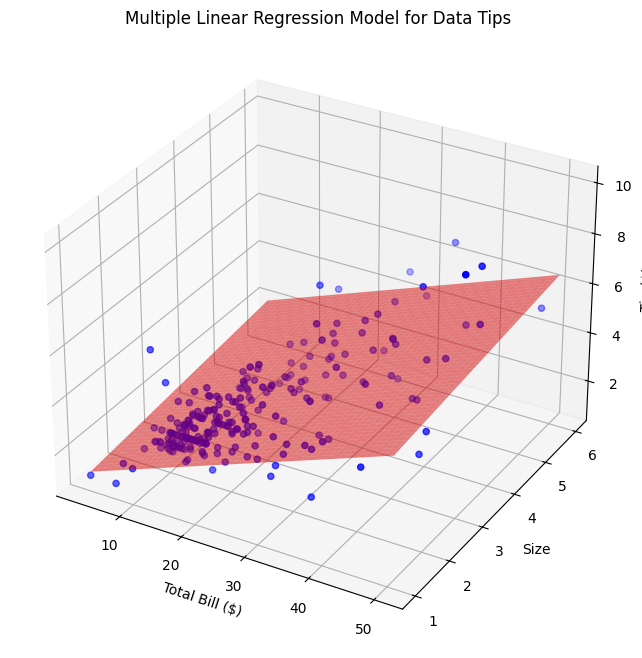

In [38]:
slope_1=0.0927 
slope_2=0.1926
intercept=0.6689

#scatterplot
fig=plt.figure(figsize=[10,8])
ax=fig.add_subplot(projection='3d')
ax.scatter(df['total_bill'],df['size'],df['tip'],color='blue')
ax.set_xlabel('Total Bill ($)')
ax.set_ylabel('Size')
ax.set_zlabel('Tip ($)')

#3d Plane
total_bill_range=np.linspace(df['total_bill'].min(),df['total_bill'].max(),100)
size_range=np.linspace(df['size'].min(),df['size'].max(),100)
total_bill_mesh, size_mesh=np.meshgrid(total_bill_range,size_range)

#insert linear regression equation
tip_mesh=intercept+slope_1*total_bill_mesh+slope_2*size_mesh

#plot 3d
ax.plot_surface(total_bill_mesh, size_mesh, tip_mesh, color='red',alpha=0.5,label='Linear Regression Plane')

plt.title('Multiple Linear Regression Model for Data Tips')
plt.show()

## Interactive Plot

In [37]:
import plotly.graph_objects as go


slope_1=0.0927 
slope_2=0.1926
intercept=0.6689


#scatterplot
fig=go.Figure()
fig.add_trace(
              go.Scatter3d(x=df['total_bill'],y=df['size'],z=df['tip'],mode='markers',marker=dict(color='blue'))
                )

#3d Plane
total_bill_range=np.linspace(df['total_bill'].min(),df['total_bill'].max(),100)
size_range=np.linspace(df['size'].min(),df['size'].max(),100)
total_bill_mesh, size_mesh=np.meshgrid(total_bill_range,size_range)

#insert linear regression equation
tip_mesh=intercept+slope_1*total_bill_mesh+slope_2*size_mesh


#plot 3d plane
fig.add_trace(
              go.Surface(x=total_bill_mesh,y=size_mesh,z=tip_mesh, colorscale='Viridis',opacity=0.5)
                )


fig.update_layout(
scene=dict(xaxis_title='Total Bill', yaxis_title='Size', zaxis_title='Tip')
    ,title='Multiple Linear Regression Model for Data Tips'
)

fig.show()

In [ ]:
Soal 1: Lakukan Multiple Linear Regression pada data toyota dengan label nya price, fiturnya 2 buah(bebas)

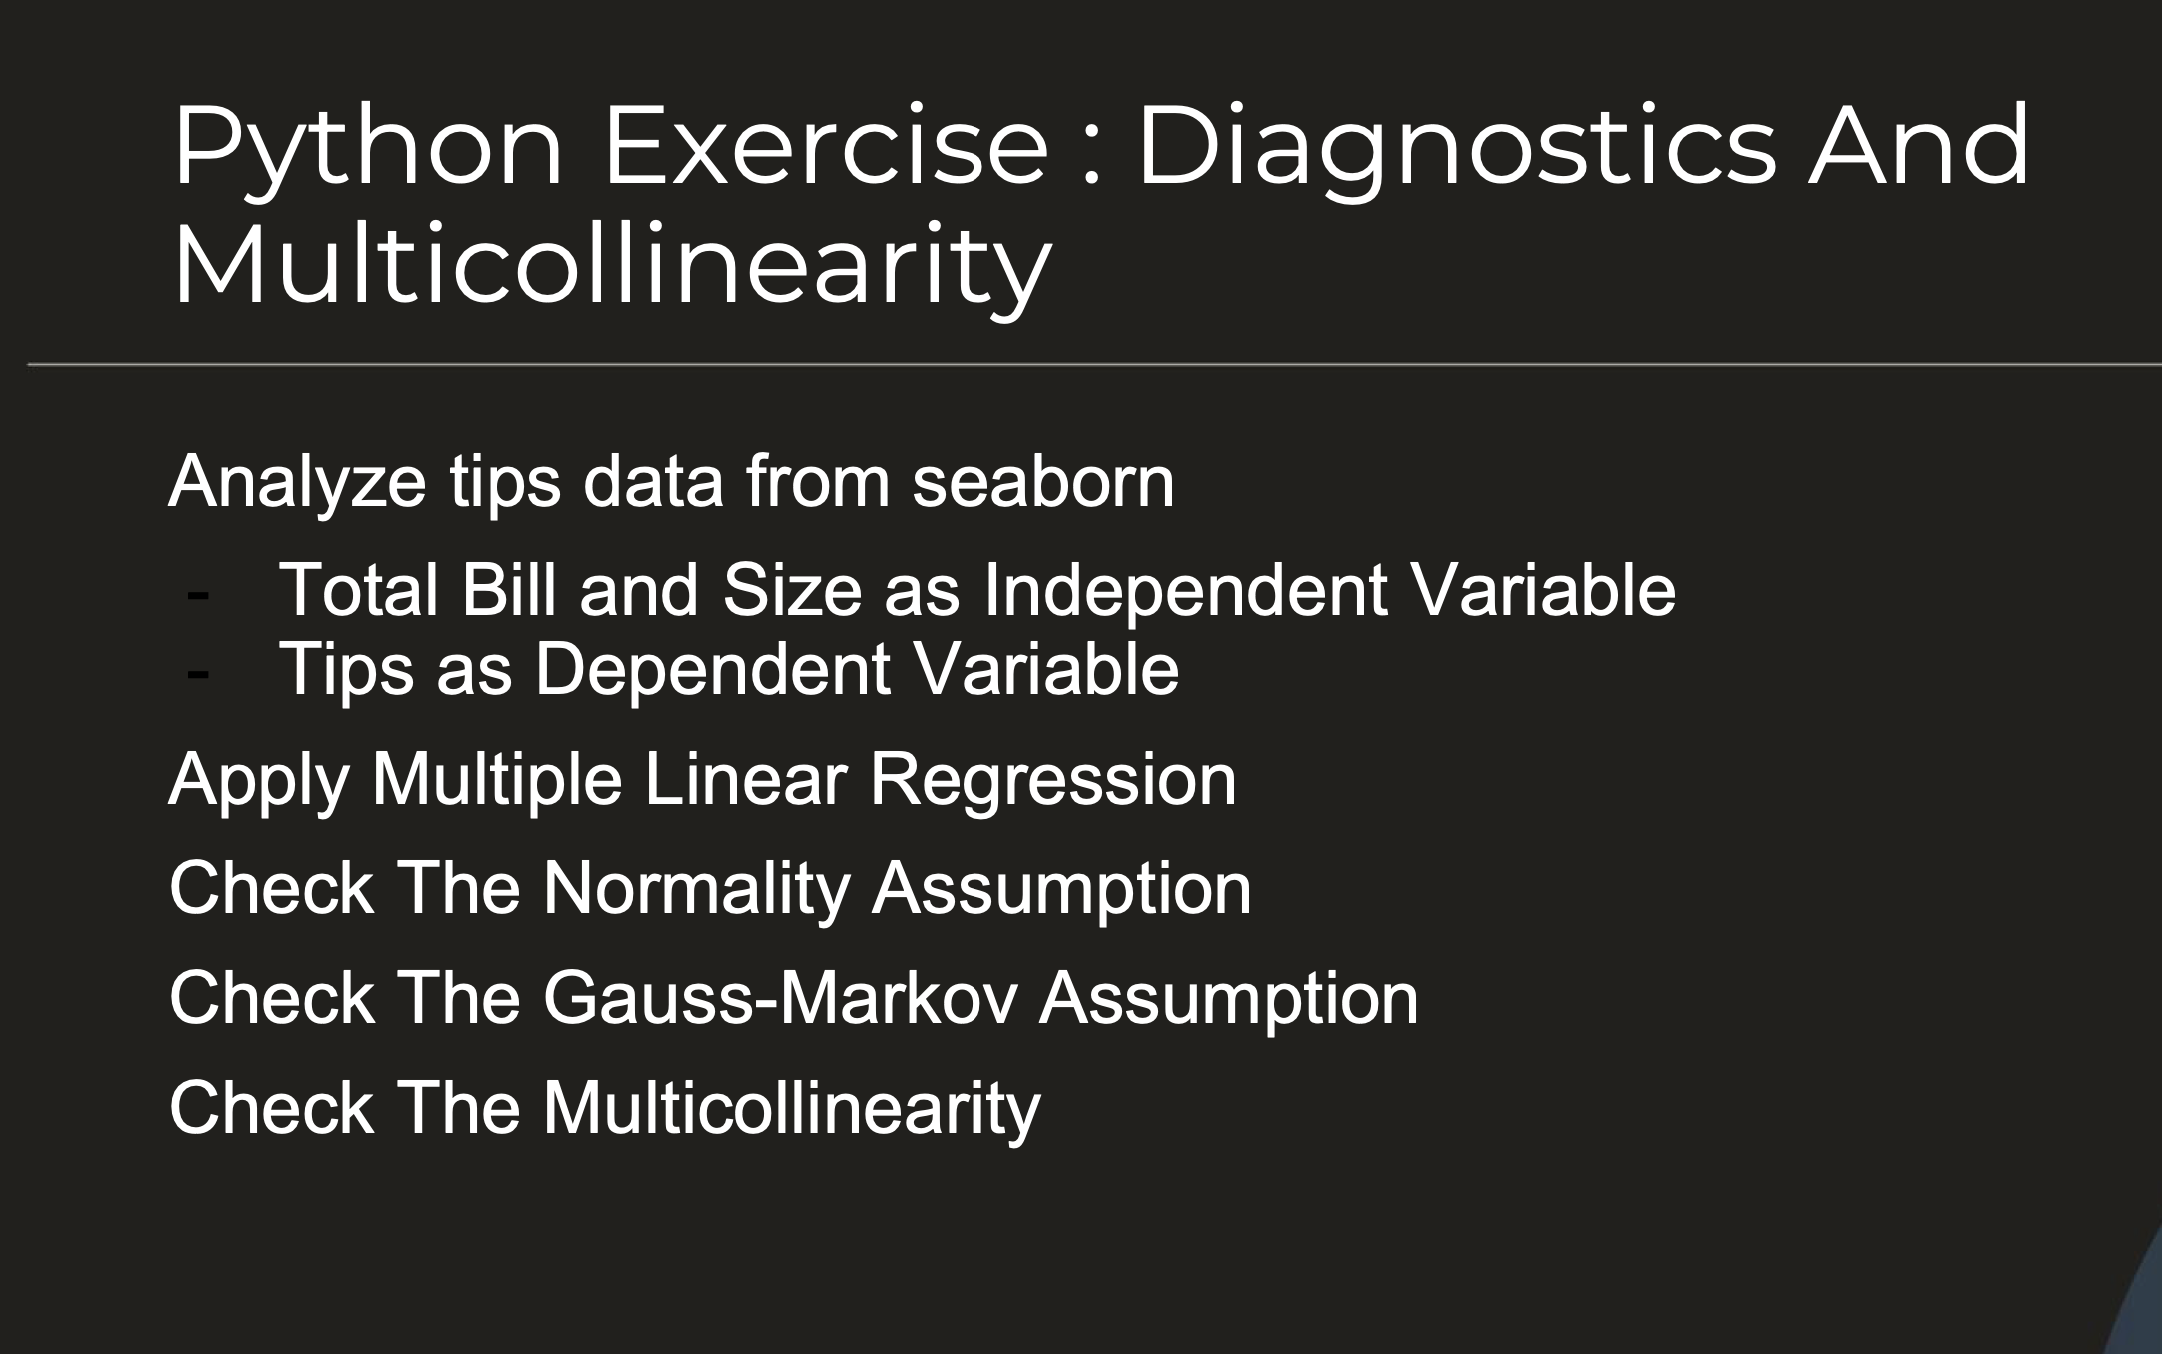

In [63]:
df=sns.load_dataset('tips')

#feature
X=df[['total_bill','size']]
X.head()

#label/target
y=df['tip']
y.head()

#add initial constant
X=sm.add_constant(X)
X.head()

#create model : Proses pendefinisian model
model=sm.OLS(y,X)

#fit model : Proses model belajar dari data
reg=model.fit()



1. Check Normality Assumption

1. Check Gauss-Markov

1. Check Multicollinearity

In [65]:
#residual
y_pred=reg.predict(X)

df_result=pd.DataFrame(
{'actual_tip' : df['tip'],
 'prediction_tip' : y_pred,
 'residual' : df['tip']- y_pred
}
)

df_result

,actual_tip,prediction_tip,residual
0,1.01,2.629340,-1.619340
1,1.66,2.205394,-0.545394
2,3.50,3.194645,0.305355
3,3.31,3.249592,0.060408
4,3.61,3.719157,-0.109157
...,...,...,...
239,5.92,3.938206,1.981794
240,2.00,3.574089,-1.574089
241,2.00,3.155952,-1.155952
242,1.75,2.706292,-0.956292


## 1. Normality Assumption

<Axes: xlabel='residual', ylabel='Count'>

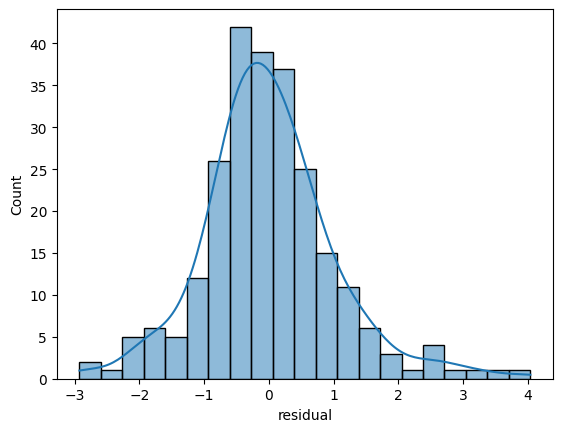

In [68]:
sns.histplot(data=df_result, x='residual', kde=True)

In [69]:
from scipy.stats import normaltest


normaltest(df_result['residual'])

NormaltestResult(statistic=24.75306343348081, pvalue=4.216388016270235e-06)

Artinya : `residual tidak terdistribusi Normal`

## 2. Gauss Markov Assumption

- rata-rata error/residual mendekati 0
- Uncorrelated Error
- Homoscedasticity (Constant Variance of Residual)

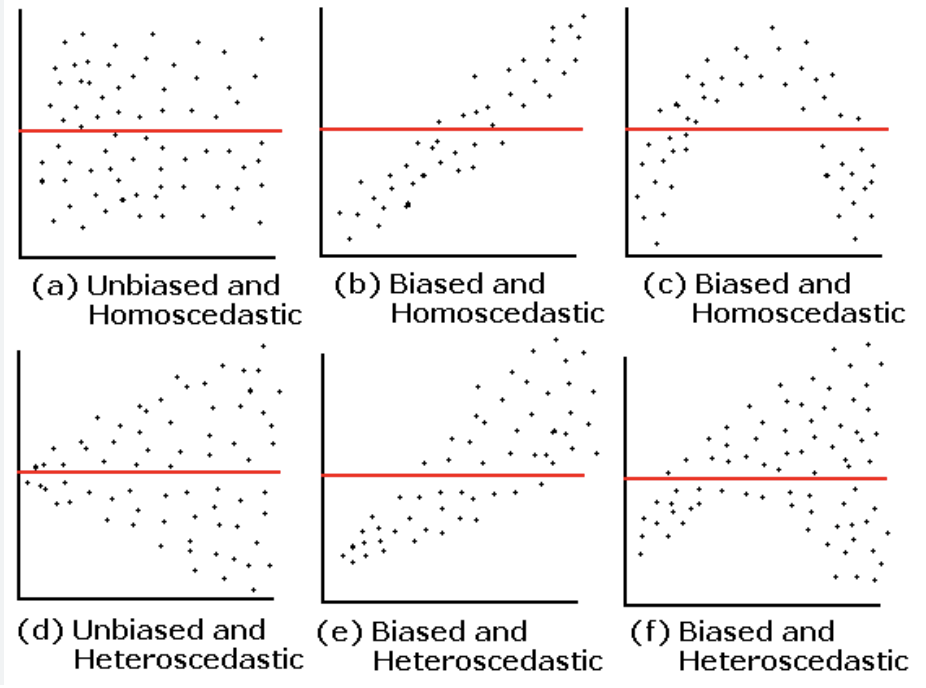

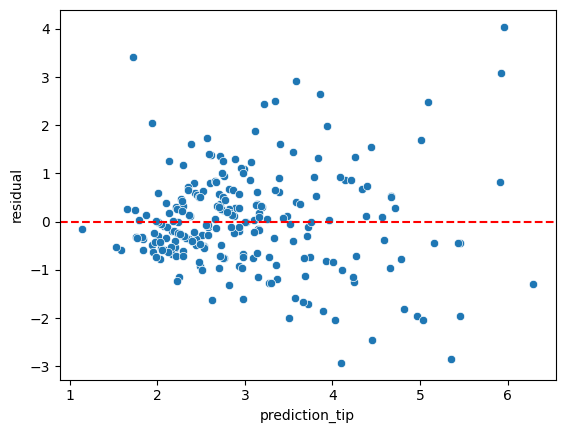

In [75]:
#residual scatter plot
sns.scatterplot(data=df_result, x='prediction_tip',y='residual')
plt.axhline(y=0,color='red',linestyle='--')
plt.show()

In [76]:
#cek rata-rata residual

df_result['residual'].mean()

-2.926620694421724e-15

## Interpretasi Gauss-Markov

1. Rata-rata residual = -2.926620694421724e-15 (mendekati 0)
    - terpenuhi, karena eror positif dan eror negatif bernilai sama
    
2. Uncorrelated Error 
    - Terpenuhi, karena tidak terdapat korelasi antara prediction_tip dengan residual
    
3. Homoscedasticty 
    - Tidak Terpenuhi, karena pada prediksi tip rendah, varians residual nya rendah, namun pada prediksi tip yang tinggi, varians residualnya tinggi

Artinya : `Gauss-Markov tidak dipenuhi`

## 3. Multicollinearity

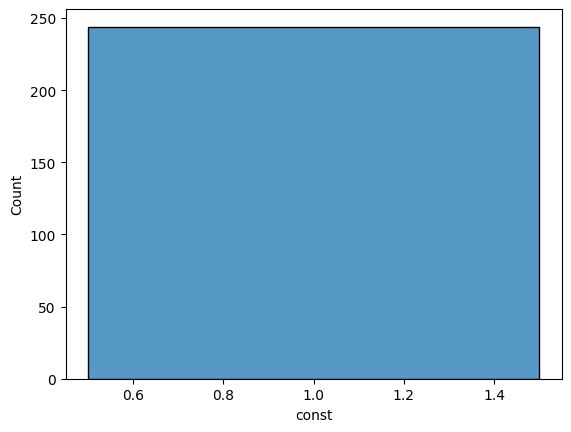

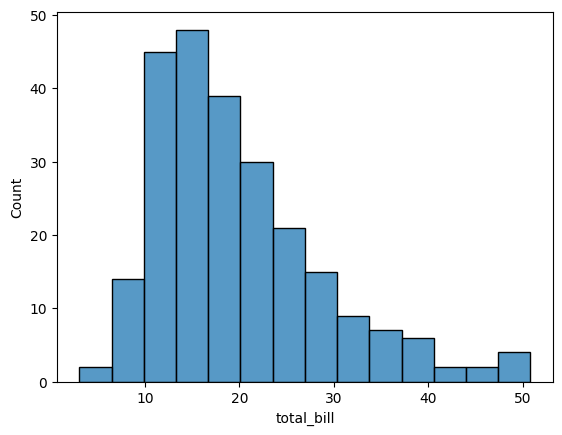

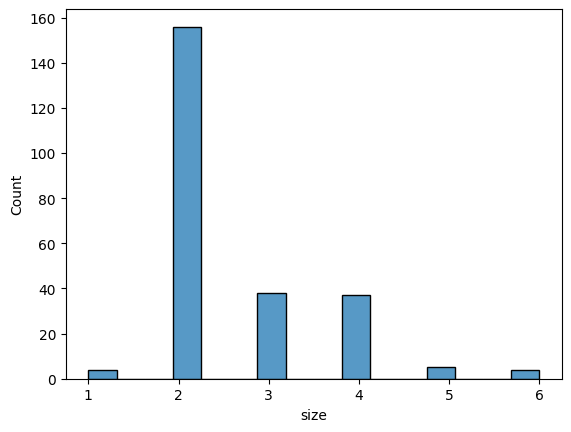

In [80]:
for i in X.columns:
    sns.histplot(data=X,x=i)
    plt.show()

<Axes: >

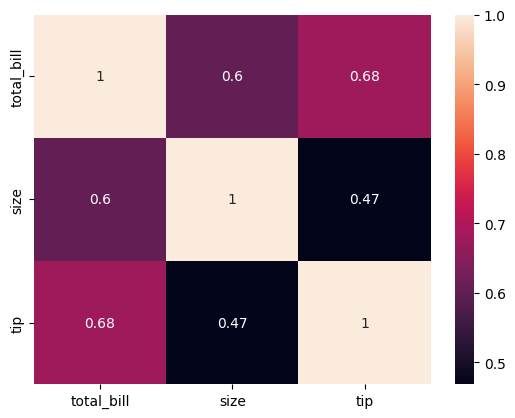

In [84]:
sns.heatmap(df[['total_bill','size','tip']].corr('spearman'),annot=True)

Artinya : `Multicollinearity di penuhi`

## Modelling with Categorical Value

In [97]:
df=sns.load_dataset('tips')

#feature
X=df[['total_bill','size','sex']]

X=pd.get_dummies(data=X,dtype=int,drop_first=True)



#label/target
y=df['tip']
y.head()

#add initial constant
X=sm.add_constant(X)
X.head()

#create model : Proses pendefinisian model
model=sm.OLS(y,X)

#fit model : Proses model belajar dari data
reg=model.fit()


#Show Summary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     70.36
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.11e-32
Time:                        14:40:16   Log-Likelihood:                -347.97
No. Observations:                 244   AIC:                             703.9
Df Residuals:                     240   BIC:                             717.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6555      0.206      3.178      0.002       0.249       1.062
total_bill     0.0929      0.009     10.104      0.000       0.075       0.111
size           0.1926      0.085      2.253      0.025       0.024       0.361
sex_Female     0.0264      0.137      0.193      0.847      -0.244       0.297
==============================================================================
Omnibus:                       25.084   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.089
Skew:                           0.550   Prob(JB):                     5.95e-11
Kurtosis:                       4.850   Cond. No.                         73.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""